<a href="https://colab.research.google.com/github/RajatSaha1106/Quantum-Noise-Modelling/blob/main/Error_Correction_Circuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit==0.46.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 16.2 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 49.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=b60f53f64a4f04ace76d8e2a18892165febf5a60bae7d8b57e51ff3c179977df
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


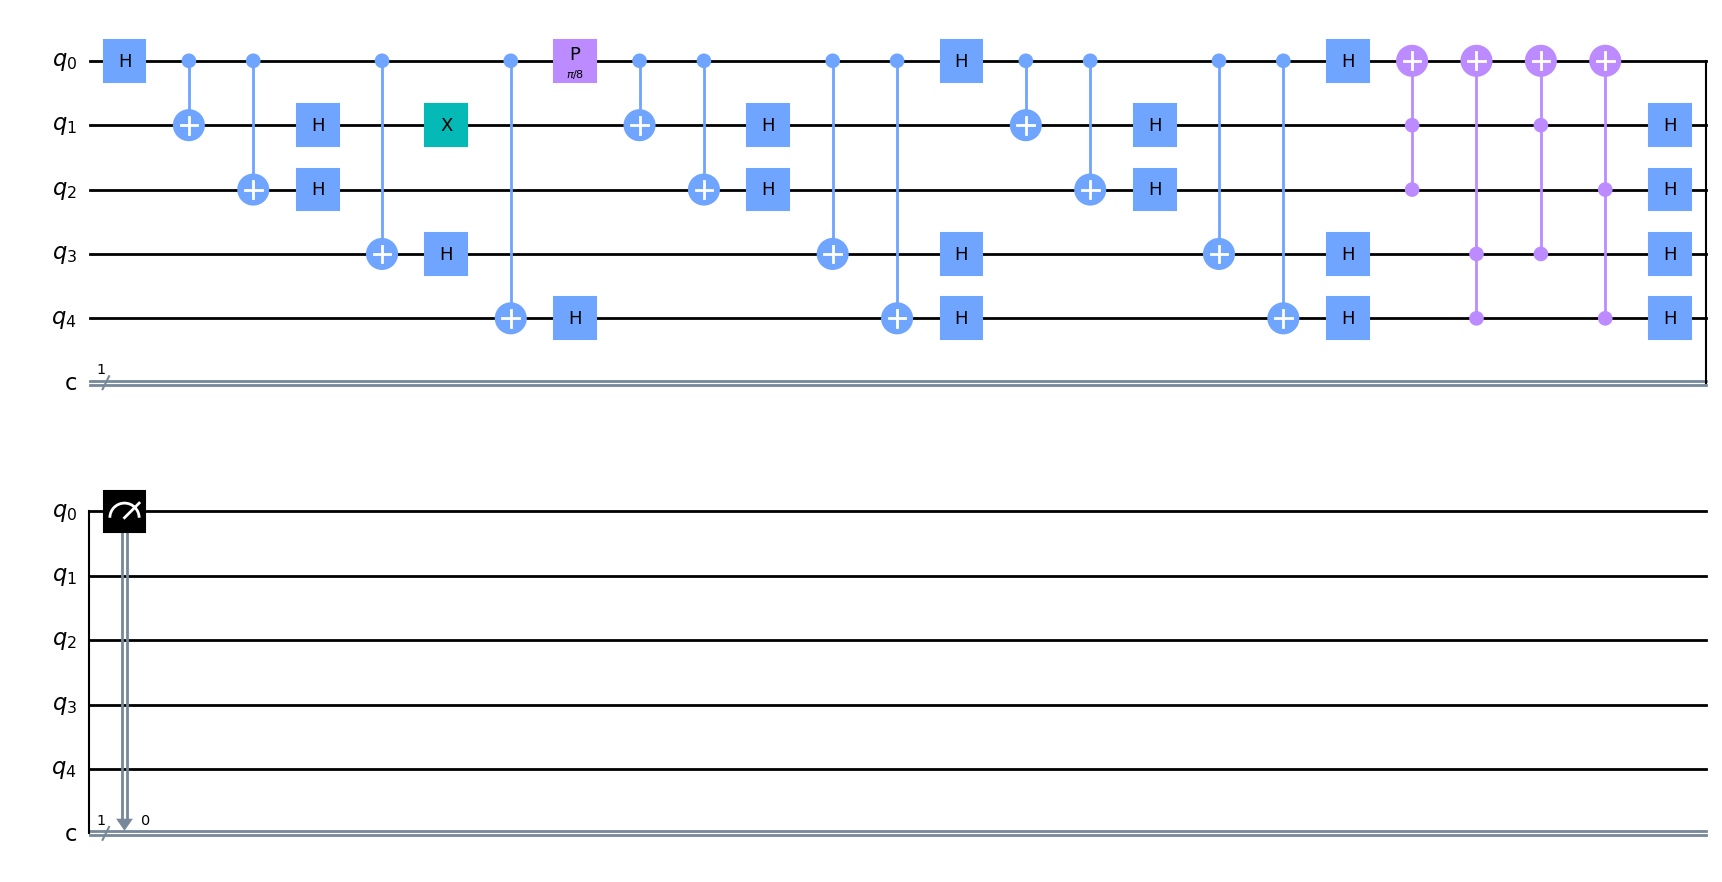

In [18]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
'''
[5,1,3] Error Correction Scheme
'''
def prepare_logical_zero():
    qc = QuantumCircuit(5)
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.cx(0, 3)
    qc.cx(0, 4)
    return qc

def encode_5_qubit_code():
    qc = QuantumCircuit(5)
    qc = prepare_logical_zero()

    qc.h(1)
    qc.h(2)
    qc.h(3)
    qc.h(4)
    return qc

def introduce_errors(qc):
    qc.x(1)
    qc.p(np.pi / 8, 0)

def correct_errors(qc):

    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.cx(0, 3)
    qc.cx(0, 4)


    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.h(3)
    qc.h(4)

    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.cx(0, 3)
    qc.cx(0, 4)

    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.h(3)
    qc.h(4)


    qc.ccx(1, 2, 0)
    qc.ccx(3, 4, 0)
    qc.ccx(1, 3, 0)
    qc.ccx(2, 4, 0)

def decode_5_qubit_code():
    qc = QuantumCircuit(5)


    qc.h(1)
    qc.h(2)
    qc.h(3)
    qc.h(4)

    return qc


qc = QuantumCircuit(5, 1)


encode_circuit = encode_5_qubit_code()
qc.compose(encode_circuit, inplace=True)


introduce_errors(qc)


correct_errors(qc)


decode_circuit = decode_5_qubit_code()
qc.compose(decode_circuit, inplace=True)
qc.measure(0, 0)

qc.draw(output='mpl')



<ipython-input-19-1abfbf8079f4>:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, backend, shots=1024)


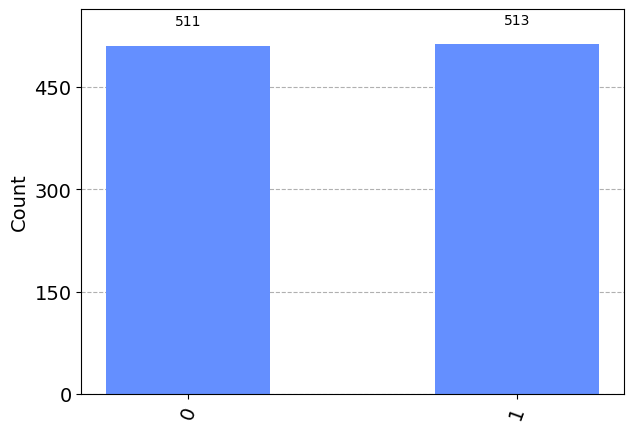

In [19]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

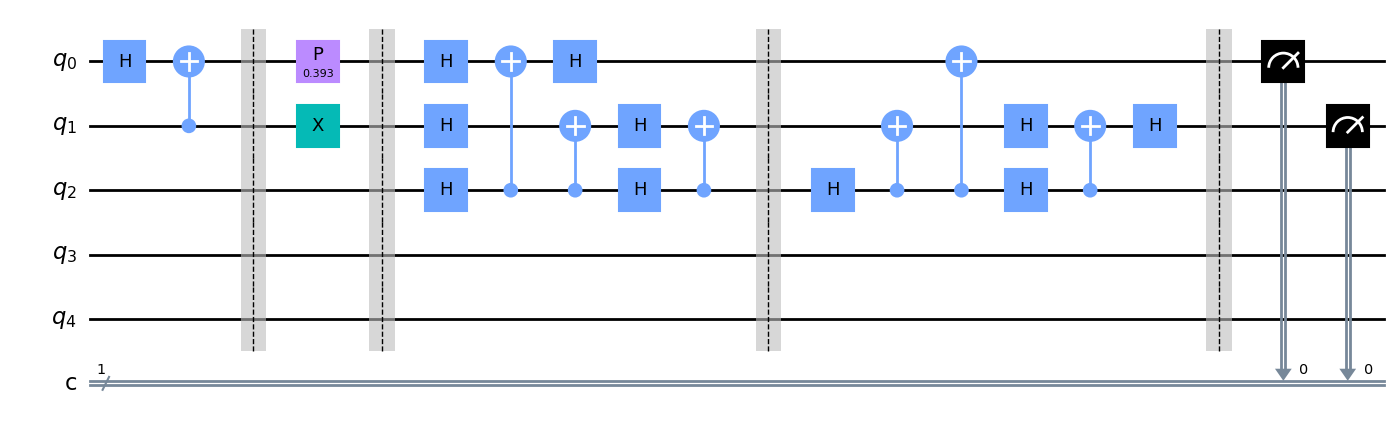

In [16]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
'''
Proposed Error Correction Scheme
'''

# Create the quantum circuit
qc = QuantumCircuit(5, 1)

# State preparation
qc.h(0)
qc.cx(1,0)

qc.barrier()

qc.x(1)  # Bit-flip error on q[1]
qc.p(0.125 * 3.14159, 0)  # Phase error on q[0]

qc.barrier()
# Bit-flip error correction

qc.h([0,1,2])
qc.cx(2,0)
qc.cx(2,1)
qc.h(0)
qc.h([1,2])
qc.cx(2, 1)

qc.barrier()
# Phase-flip and arbitrary phase change error correction
qc.h(2)
qc.cx(2, 1)
qc.cx(2, 0)
qc.h([1,2])
qc.cx(2,1)
qc.h(1)

qc.barrier()

# Measurement
qc.measure(0, 0)
qc.measure(1,0)

qc.draw(output='mpl')


<ipython-input-17-bc8bdeee8e43>:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, backend, shots=1024)


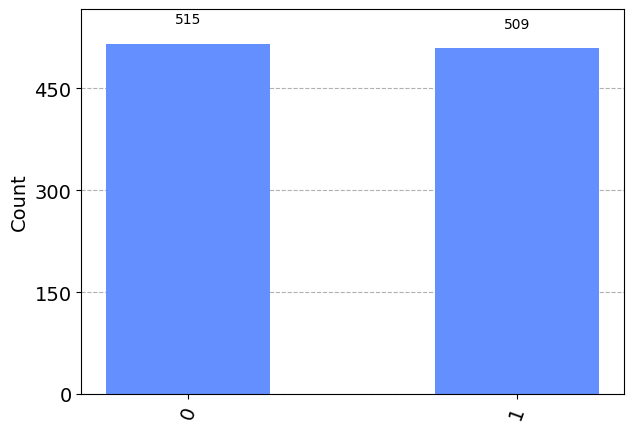

In [17]:

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()

# Plot the result
plot_histogram(counts)